In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
os.chdir('/Users/cgu3/Documents/Grape-Pi')

(array([1.1767e+04, 1.3400e+03, 1.0360e+03, 9.0900e+02, 7.4900e+02,
        7.5600e+02, 6.3800e+02, 6.0600e+02, 6.6000e+02, 6.3000e+02,
        7.0100e+02, 5.9500e+02, 5.8600e+02, 6.2300e+02, 6.1500e+02,
        5.9600e+02, 6.4500e+02, 5.1700e+02, 5.9100e+02, 4.8000e+02,
        4.7500e+02, 5.0300e+02, 4.9000e+02, 4.7100e+02, 4.0200e+02,
        3.9700e+02, 4.0500e+02, 3.2700e+02, 3.2200e+02, 3.0100e+02,
        2.9700e+02, 2.6300e+02, 2.3900e+02, 2.1000e+02, 1.9100e+02,
        1.5700e+02, 1.5400e+02, 1.4800e+02, 1.0400e+02, 9.8000e+01,
        8.5000e+01, 8.0000e+01, 6.4000e+01, 7.2000e+01, 6.5000e+01,
        6.0000e+01, 4.8000e+01, 3.3000e+01, 2.4000e+01, 3.1000e+01,
        2.3000e+01, 1.9000e+01, 1.6000e+01, 1.0000e+01, 1.2000e+01,
        1.2000e+01, 1.6000e+01, 3.0000e+00, 1.4000e+01, 1.2000e+01,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

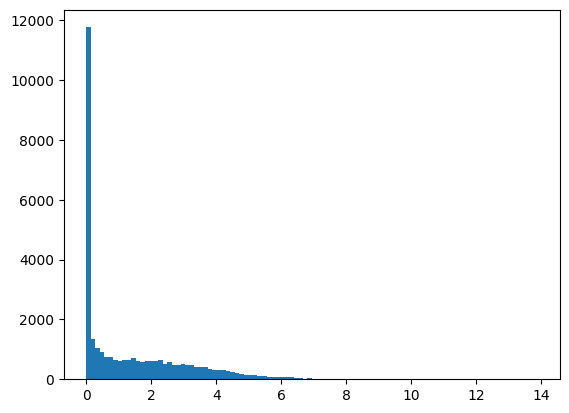

In [3]:
mRNA_data = pd.read_csv('data/miscellaneous/mRNA-data/processed_RNA_data.csv')
mRNA_data = mRNA_data.rename(columns={mRNA_data.columns[0]: 'gene_symbol'})
mRNA_data = mRNA_data.loc[:, ['gene_symbol', 'IP0981_1701']]
mRNA_data['IP0981_1701'] = np.log(mRNA_data['IP0981_1701'] + 1)
mRNA_data.head()
plt.hist(mRNA_data['IP0981_1701'], bins=100)

In [14]:
protein_data = pd.read_csv('/Users/cgu3/Documents/data/SG_combined_protein_0982_with_protein_probability.csv')
protein_data

,protein.Accession,protein_probability
0,A0A024RBG1,0.681366
1,A0A075B6H7,0.953707
2,A0A075B6I3,0.513287
3,A0A075B6I4,0.965112
4,A0A075B6J1,0.672964
...,...,...
20421,Q9UI54,0.000000
20422,Q9UI72,0.000000
20423,Q9Y3F1,0.000000
20424,Q9Y6C7,0.000000


In [15]:
import pandas as pd

def get_values_from_dict(keys, dictionary, na_rm=True):
    # Ensure the dictionary is a DataFrame
    dictionary = pd.DataFrame(dictionary)
    
    # Check for duplicated keys in the dictionary
    if dictionary.iloc[:, 0].duplicated().any():
        raise ValueError("Non-unique keys in dictionary: the same key can be mapped to multiple values")
    
    # Convert keys to a DataFrame
    keys_df = pd.DataFrame({'key': keys})
    
    # Join keys with the dictionary to get the corresponding values
    merged = keys_df.merge(dictionary, left_on='key', right_on=dictionary.columns[0], how='left')
    
    # Select the values column
    values = merged[dictionary.columns[1]]
    
    # If na_rm is True, remove NA values
    if na_rm:
        values = values.dropna()
    
    return values.tolist()

# Example usage:
# dictionary = {'key_column': ['a', 'b', 'c'], 'value_column': [1, 2, 3]}
# keys = ['a', 'b']
# print(get_values_from_dict(keys, dictionary))


In [16]:
acc_to_gene_symbol_dict = pd.read_table('data/miscellaneous/uniprotkb_proteome_UP000005640_AND_revi_2023_10_05.tsv', sep='\t')
acc_to_gene_symbol_dict

,Entry,Gene Names (primary),Length,Entry Name,STRING
0,A0A087X1C5,CYP2D7,515,CP2D7_HUMAN,NaN
1,A0A0B4J2F0,PIGBOS1,54,PIOS1_HUMAN,NaN
2,A0A0B4J2F2,SIK1B,783,SIK1B_HUMAN,9606.ENSP00000482829;
3,A0A0C5B5G6,MT-RNR1,16,MOTSC_HUMAN,NaN
4,A0A0K2S4Q6,CD300H,201,CD3CH_HUMAN,NaN
...,...,...,...,...,...
20406,Q9UI72,NaN,69,YE014_HUMAN,NaN
20407,Q9Y3F1,NaN,56,TA6P_HUMAN,NaN
20408,Q9Y6C7,LINC00312,94,L3R2A_HUMAN,NaN
20409,Q9Y6Z2,LINC01558,57,CF123_HUMAN,NaN


In [17]:
protein_data['gene_symbol'] = get_values_from_dict(protein_data['protein.Accession'], acc_to_gene_symbol_dict, na_rm=False)
protein_data.head()

,protein.Accession,protein_probability,gene_symbol
0,A0A024RBG1,0.681366,NUDT4B
1,A0A075B6H7,0.953707,IGKV3-7
2,A0A075B6I3,0.513287,IGLV11-55
3,A0A075B6I4,0.965112,IGLV10-54
4,A0A075B6J1,0.672964,IGLV5-37


In [18]:
merged_data = pd.merge(protein_data, mRNA_data, on='gene_symbol', how='left')
merged_data.fillna(0, inplace=True)
merged_data = merged_data.rename(columns={'IP0981_1701': 'mRNA_TPM'})

In [19]:
merged_data

,protein.Accession,protein_probability,gene_symbol,mRNA_TPM
0,A0A024RBG1,0.681366,NUDT4B,0.000000
1,A0A075B6H7,0.953707,IGKV3-7,0.000000
2,A0A075B6I3,0.513287,IGLV11-55,0.000000
3,A0A075B6I4,0.965112,IGLV10-54,1.656257
4,A0A075B6J1,0.672964,IGLV5-37,0.000000
...,...,...,...,...
20421,Q9UI54,0.000000,0,0.000000
20422,Q9UI72,0.000000,0,0.000000
20423,Q9Y3F1,0.000000,0,0.000000
20424,Q9Y6C7,0.000000,LINC00312,0.000000


In [20]:
merged_data.to_csv('data/single-soft-label/raw/protein/SG_combined_protein_0982_with_soft_label_and_mRNA_TPM.csv', index=False)